# EDA and Multi-label Classification of Enzyme substrate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
train_df= pd.read_csv(r'enzyme_dataset\train.csv')
test_df= pd.read_csv(r'enzyme_dataset\test.csv')
train_df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


## Exploratory Data Analysis

In [3]:
print('shape of training data:',train_df.shape)
print('shape of test data:',test_df.shape)
train_df.columns

shape of training data: (14838, 38)
shape of test data: (9893, 32)


Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [5]:
#train_df.isnull().sum().sort_values(ascending=False)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9893 non-null   int64  
 1   BertzCT            9893 non-null   float64
 2   Chi1               9893 non-null   float64
 3   Chi1n              9893 non-null   float64
 4   Chi1v              9893 non-null   float64
 5   Chi2n              9893 non-null   float64
 6   Chi2v              9893 non-null   float64
 7   Chi3v              9893 non-null   float64
 8   Chi4n              9893 non-null   float64
 9   EState_VSA1        9893 non-null   float64
 10  EState_VSA2        9893 non-null   float64
 11  ExactMolWt         9893 non-null   float64
 12  FpDensityMorgan1   9893 non-null   float64
 13  FpDensityMorgan2   9893 non-null   float64
 14  FpDensityMorgan3   9893 non-null   float64
 15  HallKierAlpha      9893 non-null   float64
 16  HeavyAtomMolWt     9893 

In [6]:
print('Total number of duplicated values:',train_df.duplicated().sum())

Total number of duplicated values: 0


In [7]:
train_df.describe().T.style.set_table_styles([{'selector': 'tr:hover',
      'props': [('background-color', 'yellow')]},{
       'selector': 'th',
       'props': [('background-color', 'lightgreen')]
   }])

,count,mean,std,min,25%,50%,75%,max
id,14838.000000,7418.500000,4283.505982,0.000000,3709.250000,7418.500000,11127.750000,14837.000000
BertzCT,14838.000000,515.153604,542.456370,0.000000,149.103601,290.987941,652.652585,4069.959780
Chi1,14838.000000,9.135189,6.819989,0.000000,4.680739,6.485270,11.170477,69.551167
Chi1n,14838.000000,5.854307,4.647064,0.000000,2.844556,4.052701,7.486791,50.174588
Chi1v,14838.000000,6.738497,5.866444,0.000000,2.932842,4.392859,8.527859,53.431954
Chi2n,14838.000000,4.432570,3.760516,0.000000,1.949719,2.970427,5.788793,32.195368
Chi2v,14838.000000,5.253221,4.925065,0.000000,2.034468,3.242775,6.609350,34.579313
Chi3v,14838.000000,3.418749,3.436208,0.000000,1.160763,1.948613,4.502070,22.880836
Chi4n,14838.000000,1.773472,1.865898,0.000000,0.503897,1.073261,2.534281,16.072810
EState_VSA1,14838.000000,29.202823,31.728679,0.000000,5.969305,17.353601,44.876559,363.705954


In [8]:
discrete_variables = train_df.select_dtypes("int64").columns
discrete_variables

Index(['id', 'NumHeteroatoms', 'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4',
       'EC5', 'EC6'],
      dtype='object')

In [9]:
train_df.shape

(14838, 38)

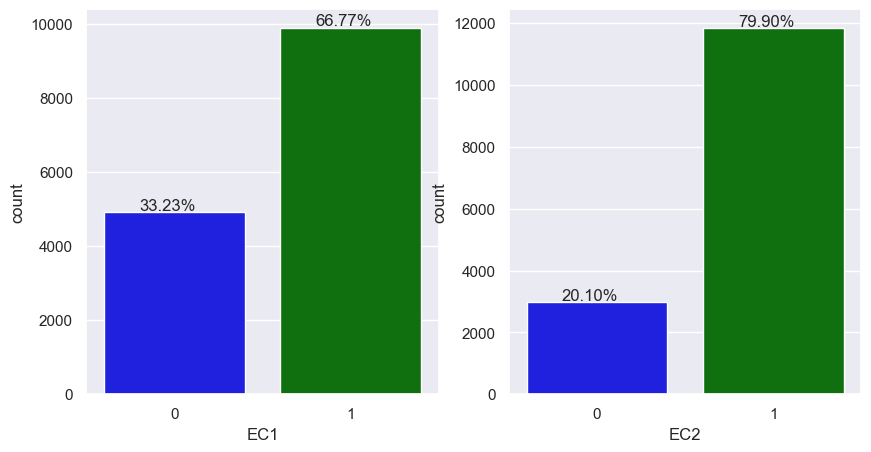

In [10]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax= sns.countplot(x='EC1',data=train_df,palette=['blue','green'],label='EC1',ax=axes[0])
for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/train_df.shape[0])*100), (p.get_x()+0.2, p.get_height()+50))
ax1= sns.countplot(x='EC2',data=train_df,palette=['blue','green'],label='EC2',ax=axes[1])
for p in ax1.patches:
        ax1.annotate('{:.2f}%'.format((p.get_height()/train_df.shape[0])*100), (p.get_x()+0.2, p.get_height()+50))

In [11]:
X= train_df[['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2']]
y= train_df[['EC1', 'EC2']]

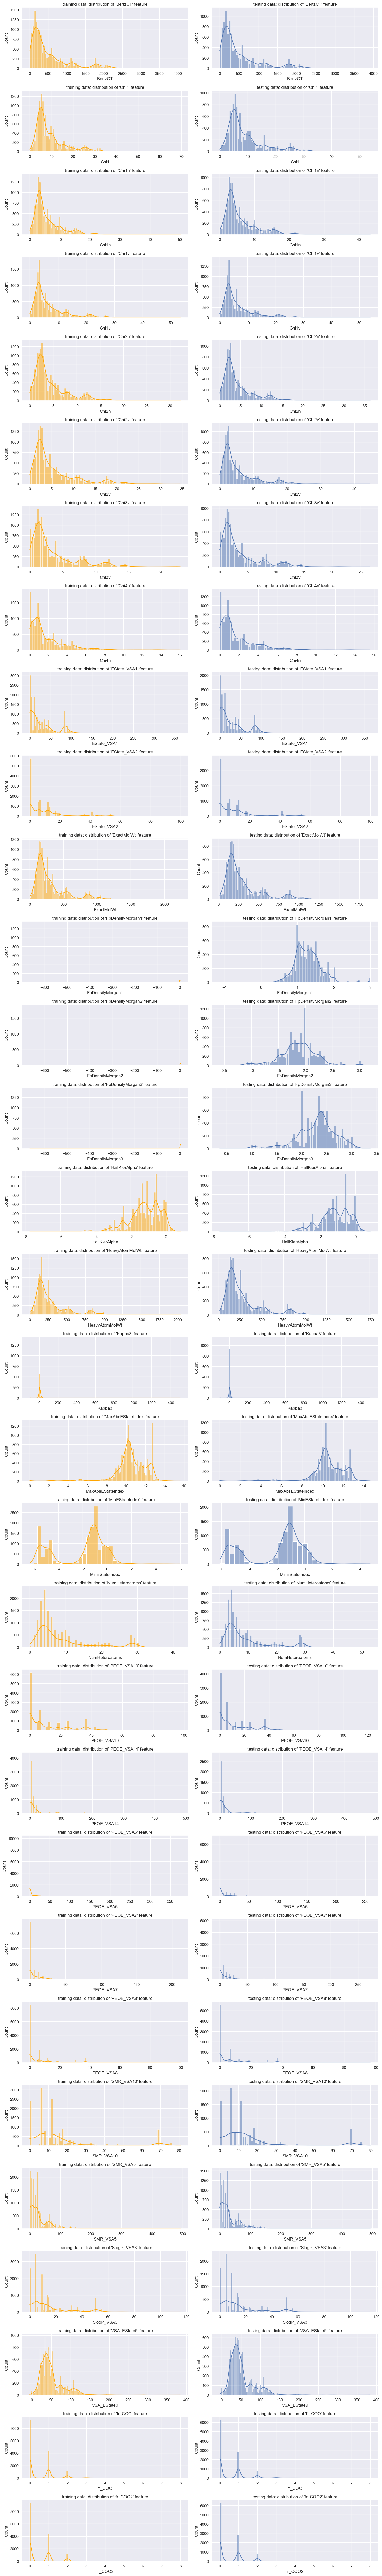

In [12]:

plt.figure(figsize=(15,100))
i = 1
for col in X.columns:
    plt.subplot(31,2,i)
    sns.histplot(train_df[col],kde=True,color='orange',)
    plt.title("training data: distribution of '{}' feature".format(col));
   
    plt.subplot(31,2,i+1)
    sns.histplot(test_df[col],kde=True)
    plt.title("testing data: distribution of '{}' feature".format(col));
    i+=2
plt.tight_layout()

<AxesSubplot:>

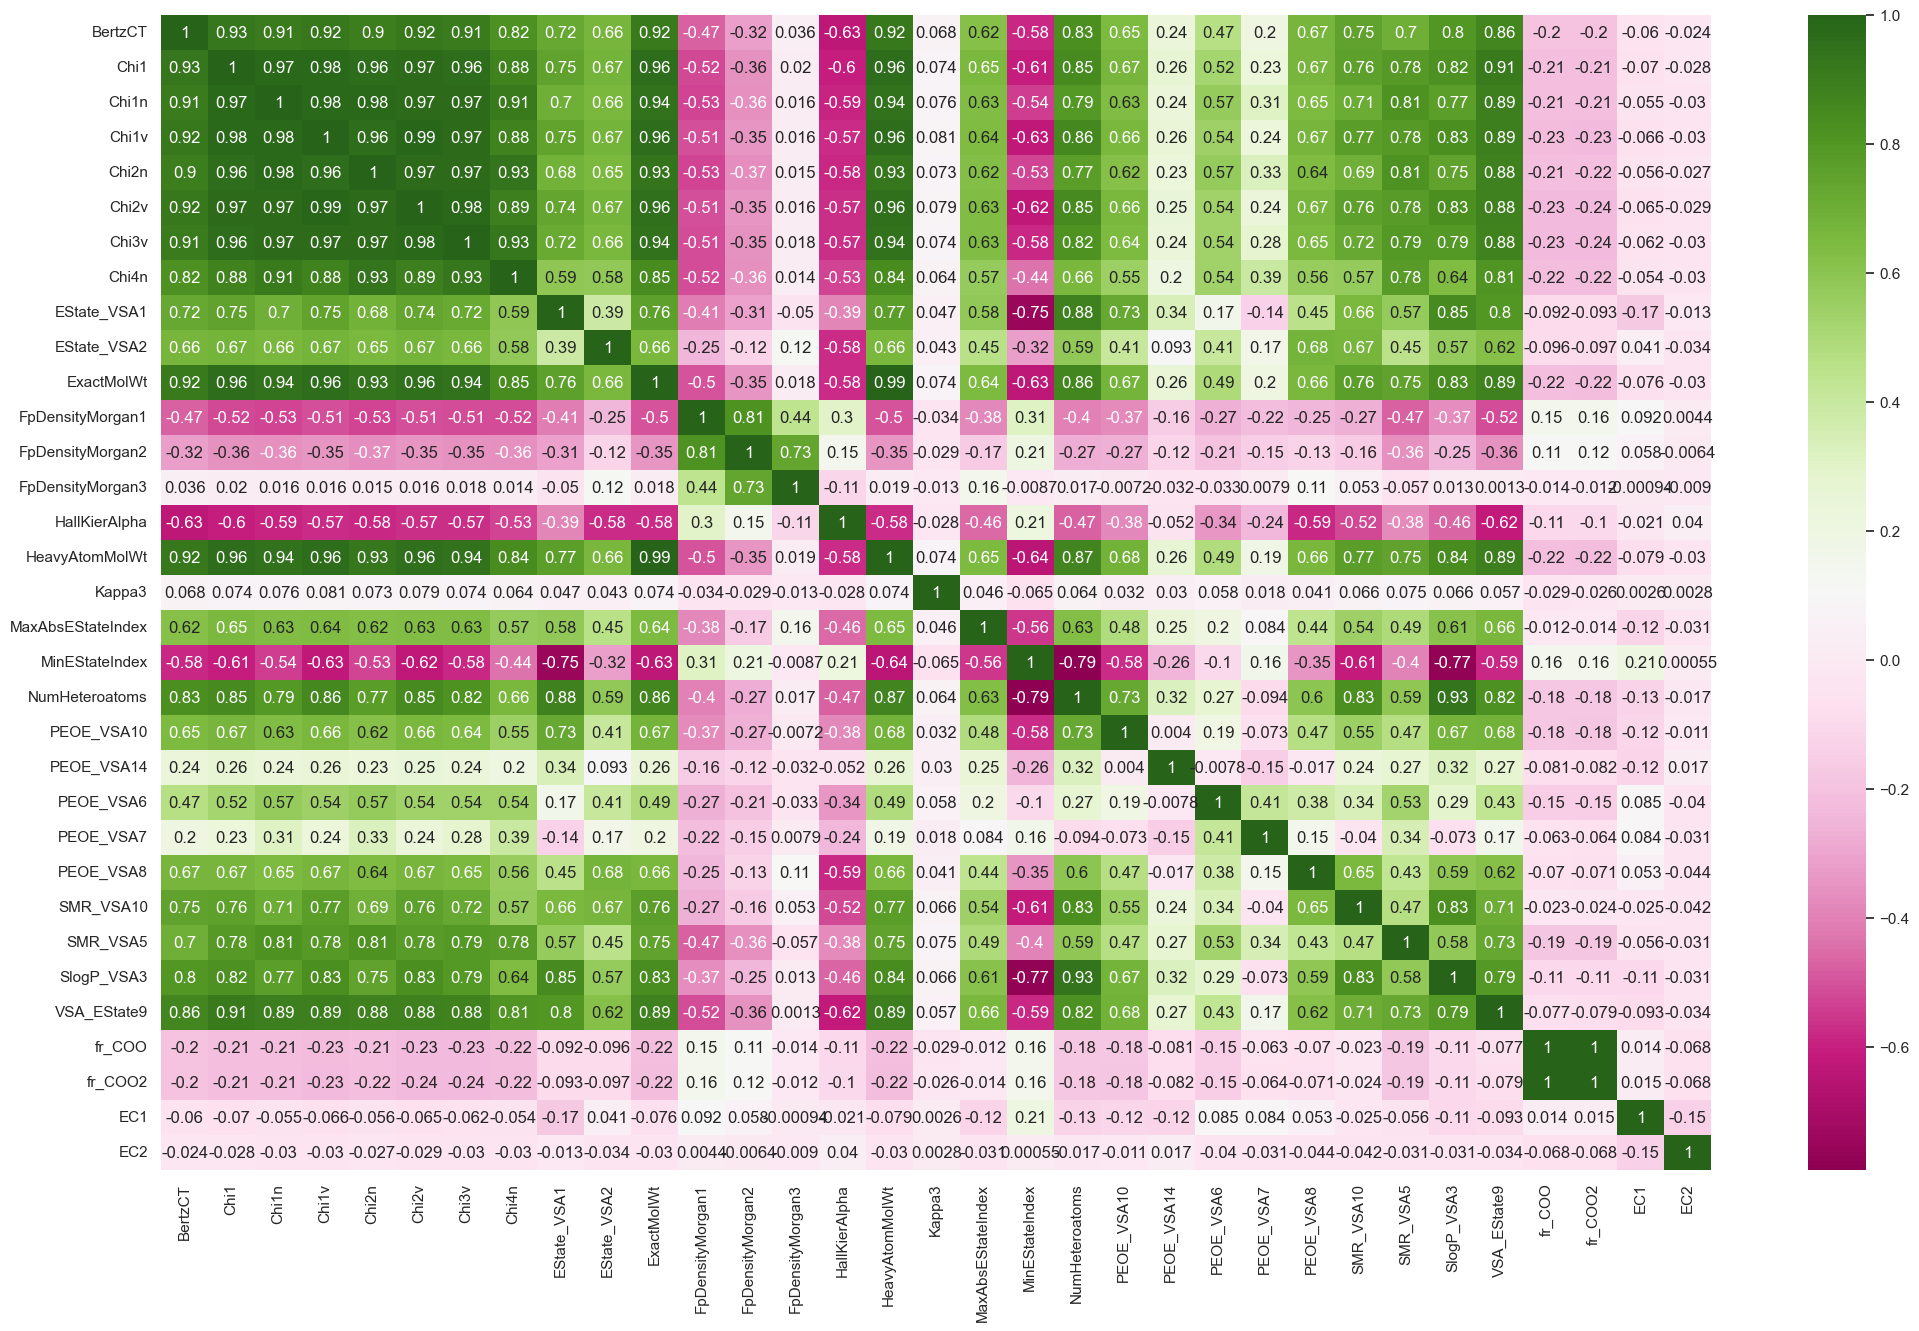

In [25]:
plt.figure(figsize=(25,15))
corr= train_df.drop(['id','EC3','EC4','EC5','EC6'],axis=1).corr()
#mask = np.triu(np.ones_like(corr))
sns.heatmap(data= corr,cmap='PiYG',annot=True)

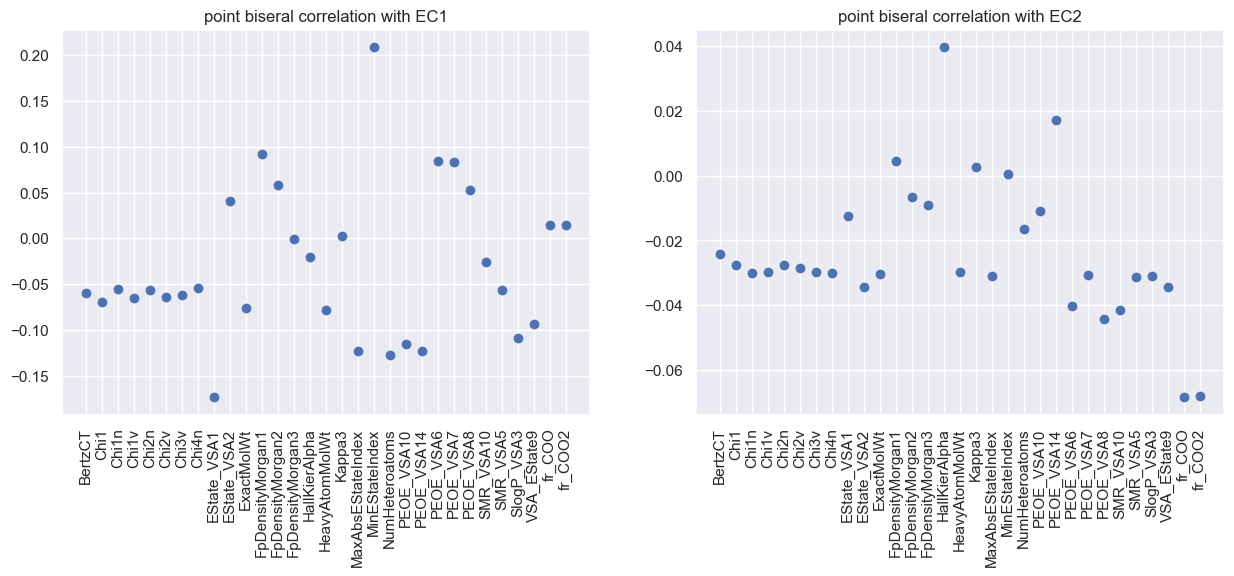

In [41]:
import scipy.stats as stats
corr1=[]
corr2=[]
for i in X.columns:
    cor1,_=stats.pointbiserialr(train_df.EC1, train_df['{}'.format(i)])
    cor2,_=stats.pointbiserialr(train_df.EC2, train_df['{}'.format(i)])
    corr1.append(cor1)
    corr2.append(cor2)
plt.figure(figsize=(15,5))    
plt.subplot(1,2,1)    
plt.scatter(X.columns,corr1)
plt.xticks(rotation = 90)
plt.title('point biseral correlation with EC1')
plt.subplot(1,2,2)
plt.scatter(X.columns,corr2)
plt.xticks(rotation = 90)
plt.title('point biseral correlation with EC2')
plt.show()

## Feature Selection

In [62]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs= SelectKBest(score_func=f_classif,k=15)
X_selected=fs.fit_transform(X,y['EC1'])

selected_indices = fs.get_support(indices=True)

# Get the feature names using the selected indices
selected_feature_names = X.columns[selected_indices]

# Get the scores of the selected features
selected_feature_scores = fs.scores_[selected_indices]
sorted_feature=sorted(list(zip(selected_feature_names, selected_feature_scores)),key=lambda x:x[1],reverse=True)
# Print the selected feature names and scores
list_top_ten=[]
for name, score in sorted_feature:
    list_top_ten.append(name)
    print(f"Feature: {name}, Score: {score}")

Feature: MinEStateIndex, Score: 676.4826799532451
Feature: EState_VSA1, Score: 461.8373827817934
Feature: NumHeteroatoms, Score: 244.9589754515781
Feature: PEOE_VSA14, Score: 229.74064282460915
Feature: MaxAbsEStateIndex, Score: 227.49922051294553
Feature: PEOE_VSA10, Score: 200.48405303170154
Feature: SlogP_VSA3, Score: 179.84208304725377
Feature: VSA_EState9, Score: 131.22780605724577
Feature: PEOE_VSA6, Score: 107.82160530821211
Feature: PEOE_VSA7, Score: 104.7142451338984
Feature: HeavyAtomMolWt, Score: 92.42075205255883
Feature: ExactMolWt, Score: 86.08510826857925
Feature: Chi1, Score: 72.34265520848254
Feature: Chi1v, Score: 64.27538153654201
Feature: Chi2v, Score: 62.267956229056146


In [15]:
drop_col= ['id','EC2','EC3','EC4','EC5','EC6']
df1=train_df.drop(drop_col,axis=1)
df4scale= df1.drop(['NumHeteroatoms', 'fr_COO', 'fr_COO2', 'EC1'],axis=1)
scaler= StandardScaler()
scaled= scaler.fit_transform(df4scale)
scaled_df= pd.DataFrame(scaled,columns=df4scale.columns)
scaled_df['EC1']=df1['EC1']
scaled_df.head()
def pair_plot():
    g=sns.pairplot(scaled_df,hue='EC1')
    for i, ax_row in enumerate(g.axes):
        for j, ax in enumerate(ax_row):
            ax.set_xlabel(g.x_vars[j], visible=True)
            ax.set_ylabel(g.y_vars[i], visible=True)
    g.tight_layout()


In [16]:
train_df.drop(train_df[train_df.FpDensityMorgan1<-100].index, axis=0,inplace=True)
train_df.drop(train_df[train_df.FpDensityMorgan1<-2.5].index, axis=0,inplace=True)

### Hyperparameter Tuning

In [17]:
from sklearn.tree import DecisionTreeClassifier 
X_train, X_val, y_train, y_val = train_test_split(X,y)
l=[]
for i in range(1,22):
    clf= DecisionTreeClassifier(max_depth=i,random_state=42).fit(X_train,y_train)
    train_score= clf.score(X_train,y_train)
    test_score= clf.score(X_val,y_val)
    l.append((test_score,train_score))
    
print(l)

[(0.49838274932614557, 0.5084471603163192), (0.5501347708894879, 0.5463695183321352), (0.555256064690027, 0.5500539180445723), (0.544743935309973, 0.5504133716750539), (0.544743935309973, 0.5540977713874911), (0.539622641509434, 0.5631739755571531), (0.5366576819407008, 0.5738677210639828), (0.5307277628032345, 0.5910316319194824), (0.530188679245283, 0.6061286843997125), (0.5226415094339623, 0.6291337167505392), (0.5097035040431267, 0.6512401150251618), (0.49326145552560646, 0.6804457225017972), (0.4921832884097035, 0.7127965492451473), (0.47304582210242585, 0.7472142343637671), (0.45660377358490567, 0.785765636232926), (0.4439353099730458, 0.8220704529115744), (0.4398921832884097, 0.8563084112149533), (0.4272237196765499, 0.8848849748382459), (0.41671159029649596, 0.9100467289719626), (0.41590296495956874, 0.9279295470884256), (0.4102425876010782, 0.9460819554277499)]


In [18]:
sorted_l=sorted(l,key= lambda tup:tup[0])
max_dep=l.index(sorted_l[-1])+1
print('optimal max_depth:{}'.format(l.index(sorted_l[-1])+1))
print('val score:{}'.format(l[2][0]))
print('training score:{}'.format(l[2][1]))

optimal max_depth:3
val score:0.555256064690027
training score:0.5500539180445723


Text(0, 0.5, 'accuracy')

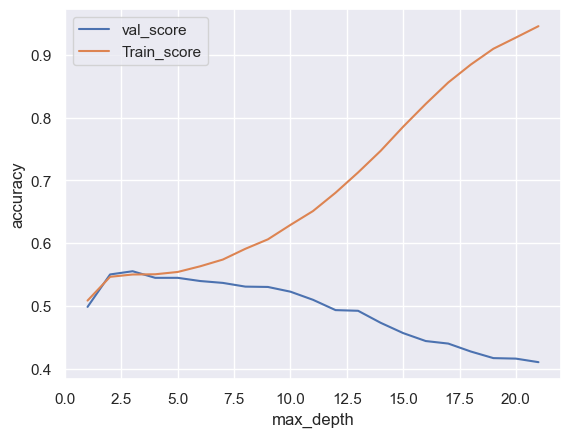

In [19]:
plt.figure()
plt.plot(range(1,22),[i[0] for i in l],range(1,22),[i[1] for i in l])
plt.legend(['val_score','Train_score'])
plt.xlabel('max_depth')
plt.ylabel('accuracy')

<AxesSubplot:>

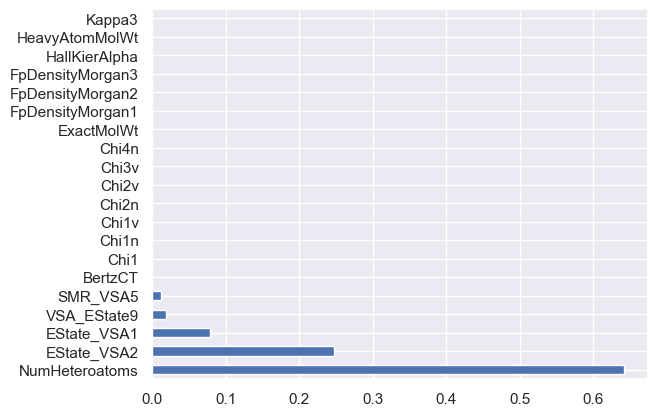

In [20]:
clf= DecisionTreeClassifier(max_depth=max_dep,random_state=42).fit(X_train,y_train)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [59]:
feature_importance_tuples = list(zip(X.columns, feat_importances))

# Sort the list of tuples based on importance scores in descending order
sorted_feature_importance = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)
list_top=[]
# Print the sorted feature names and importance scores
for name, importance in sorted_feature_importance:
    list_top.append(name)
    print(f"Feature: {name}, Importance: {importance}")

Feature: NumHeteroatoms, Importance: 0.6423467050581682
Feature: EState_VSA2, Importance: 0.2475209888647892
Feature: EState_VSA1, Importance: 0.07926054686867173
Feature: VSA_EState9, Importance: 0.018572767982148016
Feature: SMR_VSA5, Importance: 0.012298991226222796
Feature: BertzCT, Importance: 0.0
Feature: Chi1, Importance: 0.0
Feature: Chi1n, Importance: 0.0
Feature: Chi1v, Importance: 0.0
Feature: Chi2n, Importance: 0.0
Feature: Chi2v, Importance: 0.0
Feature: Chi3v, Importance: 0.0
Feature: Chi4n, Importance: 0.0
Feature: ExactMolWt, Importance: 0.0
Feature: FpDensityMorgan1, Importance: 0.0
Feature: FpDensityMorgan2, Importance: 0.0
Feature: FpDensityMorgan3, Importance: 0.0
Feature: HallKierAlpha, Importance: 0.0
Feature: HeavyAtomMolWt, Importance: 0.0
Feature: Kappa3, Importance: 0.0
Feature: MaxAbsEStateIndex, Importance: 0.0
Feature: MinEStateIndex, Importance: 0.0
Feature: PEOE_VSA10, Importance: 0.0
Feature: PEOE_VSA14, Importance: 0.0
Feature: PEOE_VSA6, Importance: 0.

## Classification Model Selection

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
clf= GradientBoostingClassifier(max_depth=max_dep,random_state=0).fit(X_train[list_top_ten[:10]],y_train['EC1'])
xval_pred=clf.predict(X_val[list_top_ten[:10]])
clf.score(X_val[list_top_ten[:10]],y_val['EC1'])


0.7064690026954178

In [85]:
#submission latest with top_ten decisiontree
#submission 1 with top_ten, 2 without
clf1= GradientBoostingClassifier(max_depth=max_dep,random_state=0).fit(train_df[test_df.columns],train_df['EC1'])
test_pred1= clf1.predict(test_df)
test_pred1=pd.Series(test_pred1)

clf2= GradientBoostingClassifier(max_depth=max_dep,random_state=0).fit(train_df[test_df.columns],train_df['EC2'])
test_pred2= clf2.predict(test_df)
test_pred2=pd.Series(test_pred2)

data={'EC1':test_pred1,'EC2':test_pred2}
#sub_df=pd.DataFrame(data)


In [90]:
#submission3
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=max_dep,random_state=0).fit(X_train,y_train)
pred=clf.predict(test_df.drop('id',axis=1))
sub_df=pd.DataFrame(pred,columns=['EC1','EC2'])

In [91]:
sub_df.shape

(9893, 2)

In [92]:
sub_df['id']=range(14838,24731)
sub_df.index=sub_df['id']
sub_df=sub_df.drop('id',axis=1)
submission_csv= sub_df.to_csv('submission3.csv')
sub_df

,EC1,EC2
id,,
14838,1,1
14839,1,1
14840,1,1
14841,1,1
14842,1,1
...,...,...
24726,1,1
24727,1,1
24728,1,1
